In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from itertools import product
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from IPython.display import Markdown
def print_markdown(string):
    display(Markdown(string))
def printmd(string):
    display(Markdown(string))

# <mark>Random graphs</mark>

## <span style="background-color: #00FF00">Erdos-Renyi-model</span>

The Erdos-Renyi-model is constructed as follows:

- We are given $n$ nodes and a link probability $p$, that can be constant or dependent on $n$. 
- For each pair of nodes $\{i,j\}$ we add the (unweighted) link $\{i,j\}$ with independent probability $p$. 

**Expected number of (undirected) links**: binomial random variable with parameters $\binom{n}{2}p = n(n-1)p/2$.

**Expected average degree**: $E[\overline{w}] = (n-1)p$.

We now generate an Erdos-Renyi graph and investigate its properties, specifically **connectedness** and **degree distribution**.

### <span style="background-color: #66CDAA">Case 1: constant $p$</span>

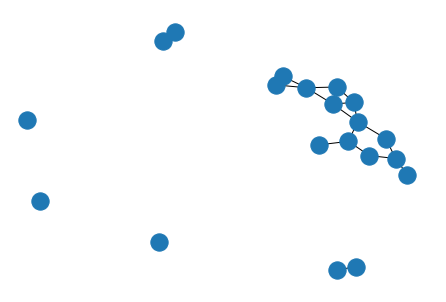

In [2]:
import scipy.io as sio
import scipy as sp
import collections 

# Construction of the Erdos-Renyi model

p = 0.1
n = 20
W = np.zeros((n,n))

# fill the bottom-left block of W (undirected graph)
for i in range(n):
    for j in range(i):
        W[i,j] = np.random.choice([0,1], p=[1-p,p])


# fill the top-right block
W = W + W.T

G = nx.from_numpy_array(W)

nx.draw(G)

With these parameters, the graph is disconnected with high probability, because the expected average degree is small. Let us increase $n$ while keeping $p$ constant.

Expected number of links: 1990.0
Number of links: 1980


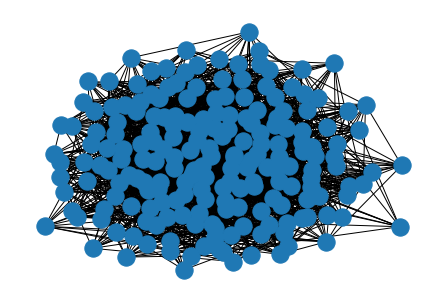

In [3]:
p = 0.1
n = 200
W = np.zeros((n,n))
W = W + W.T

for i in range(n):
    for j in range(i):
        W[i,j] = np.random.choice([0,1], p= [1-p,p])
    
G = nx.from_numpy_array(W, create_using=nx.Graph)

nx.draw(G)

print("Expected number of links:", p*n*(n-1)/2)
print("Number of links:", G.number_of_edges())

In [4]:
print("The graph is connected:", nx.is_connected(G))

The graph is connected: True


Now the plot of the graph is confusing, but the graph is connected.

This shows that $p$ is not the best parameter to capture the connectivity properties of an Erdos-Renyi graph, unless we specify $n$. In the next part, we shall consider cases in which $p$ is a function of $n$.

The problem of keeping $p$ fixed is that the expected average degree grows linearly with $n$, which is quite unrealistic. In fact, typically real networks are sparse.

We study two regimes of interest: 
- $p \propto log(n)/n$ (average degree scaling with $log(n)$), and 
- $p \propto 1/n$ (constant average degree).

### <span style="background-color: #66CDAA">Case 2: $p = a \frac{log(n)}{n}$</span>

Let us generate a large network and count the number of isolated nodes as a first connectivity measure. As we have seen before, if $p$ is fixed and $n$ increases the connectivity of the graph increases. Let us see if this changes when $p$ scales with $n$.

In [5]:
a = 2
n = 100
p = a*np.log(n)/n

W = np.zeros((n,n))

for i in range(n):
    for j in range(i):
        W[i,j] = np.random.choice([0,1], p= [1-p,p])
        
W = W + W.T
degree = W @ np.ones(n)

nodes_zero_degree = len(degree[degree == 0.])

print("Number of isolated nodes:", nodes_zero_degree)

Number of isolated nodes: 0


Let us increase $n$

In [6]:
a = 2
n_vec = np.arange(100,1100,200)

for n in n_vec:
    
    p = a*np.log(n)/n
    W = np.zeros((n,n))

    for i in range(n):
        for j in range(i):
            W[i,j] = np.random.choice([0,1], p= [1-p,p])

    W = W + W.T
    degree = W @ np.ones(n)
    
    nodes_zero_degree = len(degree[degree == 0.])
    
    print("n:", n)
    print("Number of isolated nodes:", nodes_zero_degree, "\n")

n: 100
Number of isolated nodes: 0 

n: 300
Number of isolated nodes: 0 

n: 500
Number of isolated nodes: 0 

n: 700
Number of isolated nodes: 0 

n: 900
Number of isolated nodes: 0 



Let us now try different values of $a$ while keeping $n$ fixed.

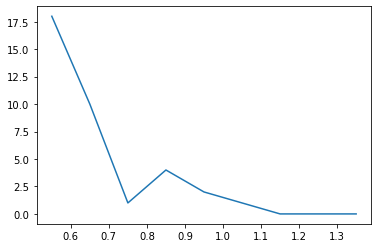

In [7]:
a_vec = np.arange(0.55,1.45,0.1)

nodes_zero_degree = []

for a in a_vec:
    n = 600
    p = a*np.log(n)/n

    W = np.zeros((n,n))

    for i in range(n):
        for j in range(i):
            W[i,j] = np.random.choice([0,1], p=[1-p,p])

    W = W + W.T
    degree = W @ np.ones(n)

    nodes_zero_degree.append(len(degree[degree == 0.]))
    
plt.plot(list(a_vec), nodes_zero_degree)

As expected, as $a$ increases the connectivity of the graph increases and the number of isolated nodes decreases.

In fact, one can prove that a phase transition occurs as $a$ varies.

The probability that a node is isolated is $(1-p)^{n-1}$. Thus, the number of isolated nodes in expectation is

$$
E[N_0] = \sum_{i} (1-p)^{n-1} = n(1-p)^{n-1}.
$$

If $p$ is a constant, as $n \to +\infty$ we get $E[N_0] \to 0$.

Instead one can show that if $p = a \frac{log(n)}{n}$, then $E[N_0] \to n^{1-a}$ as $n \to +\infty$, which means that:

- if $a > 1$, $E[N_0] = 0$;
- if $a < 1$, $E[N_0] = +\infty$.

The number of isolated nodes is a measure of connectivity of the graph. Another interesting question is whether the graph is connected or not.

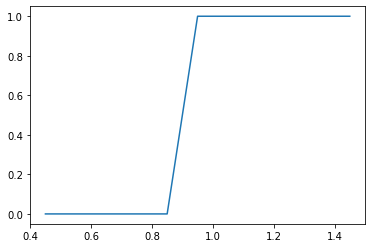

In [8]:
a_vec = np.arange(0.45,1.55,0.1)

is_connected = []

for a in a_vec:
    # generate the random graph
    n = 600
    p = a*np.log(n)/n

    W = np.zeros((n,n))

    for i in range(n):
        for j in range(i):
            W[i,j] = np.random.choice([0,1], p= [1-p,p])

    W = W + W.T
    G = nx.from_numpy_array(W, create_using=nx.Graph)
    # check whether is connected or not
    is_connected.append(nx.is_connected(G))
    
plt.plot(list(a_vec), is_connected)

One can prove that, as $n \to +\infty$, with large probability:
- if $a>1$, the graph is connected;
- if $a<1$, the graph is not connected.

It can also be proven that the diameter of the graph scales with $log(n)$.

### <span style="background-color: #66CDAA">Case 3: $p = \frac{\lambda}{n}$.</span>

While in case of constant $p$ and $p \propto \frac{log(n)}{n}$ the average degree of the nodes diverges as $n$ grows, here the average degree remains bounded. One can show that the degree distribution follows a Poisson distribution, i.e.,

$$
p_k := \frac{1}{n}|\{i: w_i = k\}| = e^{-\lambda}\frac{\lambda^k}{k!}
$$

In this case the graph is with probability 1 disconnected as $n \to +\infty$. 

There is another phase transition occurring regarding the size of the largest connected component. Specifically, as $n \to +\infty$:

- if $\lambda<1$, then the size of each connected component $i$ satisfies with probability 1 $C_i \le A log(n)$, i.e., each connected component contains a vanishing fraction of the total number of ndoes;
- if $\lambda>1$, with probability 1 the largest component has size $C_{max} = n(1-x)$, where $x$ solves $x = e^{\lambda(x-1)}$. Moreover, the size of the second largest component scales with $log(n)$.

The last property is proved by showing that an Erdos-Renyi graph is locally tree-like (i.e., there are no short cycles) and using results from branching processes.

Text(0.5, 0, 'Degree ER')

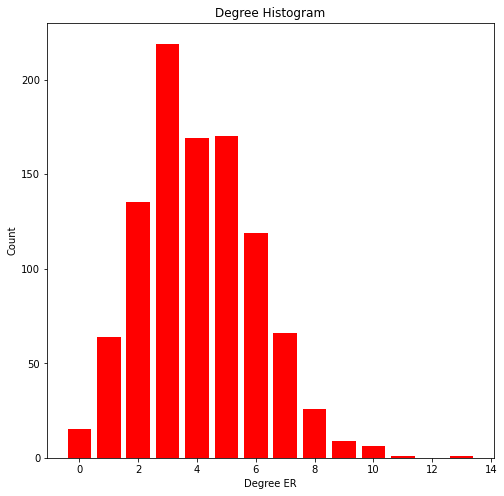

In [9]:
import collections 

a = 4
n = 1000
p = a/n

W = np.zeros((n,n))

for i in range(n):
    for j in range(i):
        W[i,j] = np.random.choice([0,1], p= [1-p,p])

W = W + W.T
G = nx.from_numpy_array(W, create_using=nx.Graph)

degree = W @ np.ones(n)
degreeCount = collections.Counter(degree)
deg, cnt = zip(*degreeCount.items())

fig = plt.figure(figsize=(8,8))
plt.bar(deg, cnt, width=0.80, color="r")
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree ER")

Notice that the degree distribution is first increasing and then decreasing, meaning that a large fraction of the nodes has a degree close to the expected average degree, thus the average degree is a good approximation for the degree of a random node of the graph. The variance of the degree distribution is "small".

We shall see in the next lecture that in real networks, as well as other random graphs (e.g., preferential attachment), the variance of the degree distribution is large, i.e., there are a few nodes with very large degree and many nodes with a small degree (compared to average degree).

We finally compute the **clustering coefficient** of the graph, which is the number of triangles in the graph.

In terms of social networks, clustering coefficient in some sense describes "how many friends of a given node are friends to each other".

We expect that clustering coefficient in ER graph is small. Indeed, because of the random structure of the connections there is no reason to expect triangles in the graph.

In [10]:
clustering_ER = nx.average_clustering(G)

print("Clustering coefficient in ER graph:", clustering_ER)

Clustering coefficient in ER graph: 0.004165201465201465


## <span style="background-color: #00FF00">Small world networks</span>

Small world networks are characterized by two features:

- small diameter (sublinear in $n$);
- large clustering coefficient (i.e., large number of triangles in the graph).

For the range of parameters $(n,p)$ that make the graph connected, ER graphs satisfy the first condition (the diameter scales with $log(n)$), but not the second one.

Let us see how to generate a small world network. An example is as follows. We start with the following augmented ring.

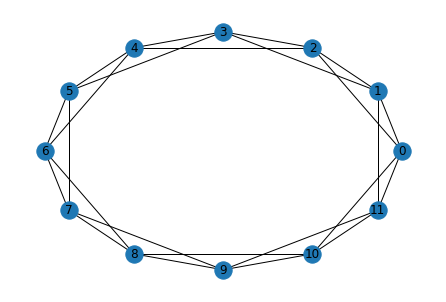

In [11]:
n_nodes = 12

G = nx.cycle_graph(n_nodes)

for n in range(n_nodes):
    G.add_edge(n,((n+2) % n_nodes))
    G.add_edge(n,((n-2) % n_nodes))

pos = nx.circular_layout(G)

nx.draw(G,pos,with_labels=True)

Let us generate larger graphs like this, and investigate clustering coefficient and diameter.

n: 40
diameter 10
clustering coefficient 0.5 

n: 80
diameter 20
clustering coefficient 0.5 

n: 160
diameter 40
clustering coefficient 0.5 

n: 320
diameter 80
clustering coefficient 0.5 

n: 640
diameter 160
clustering coefficient 0.5 



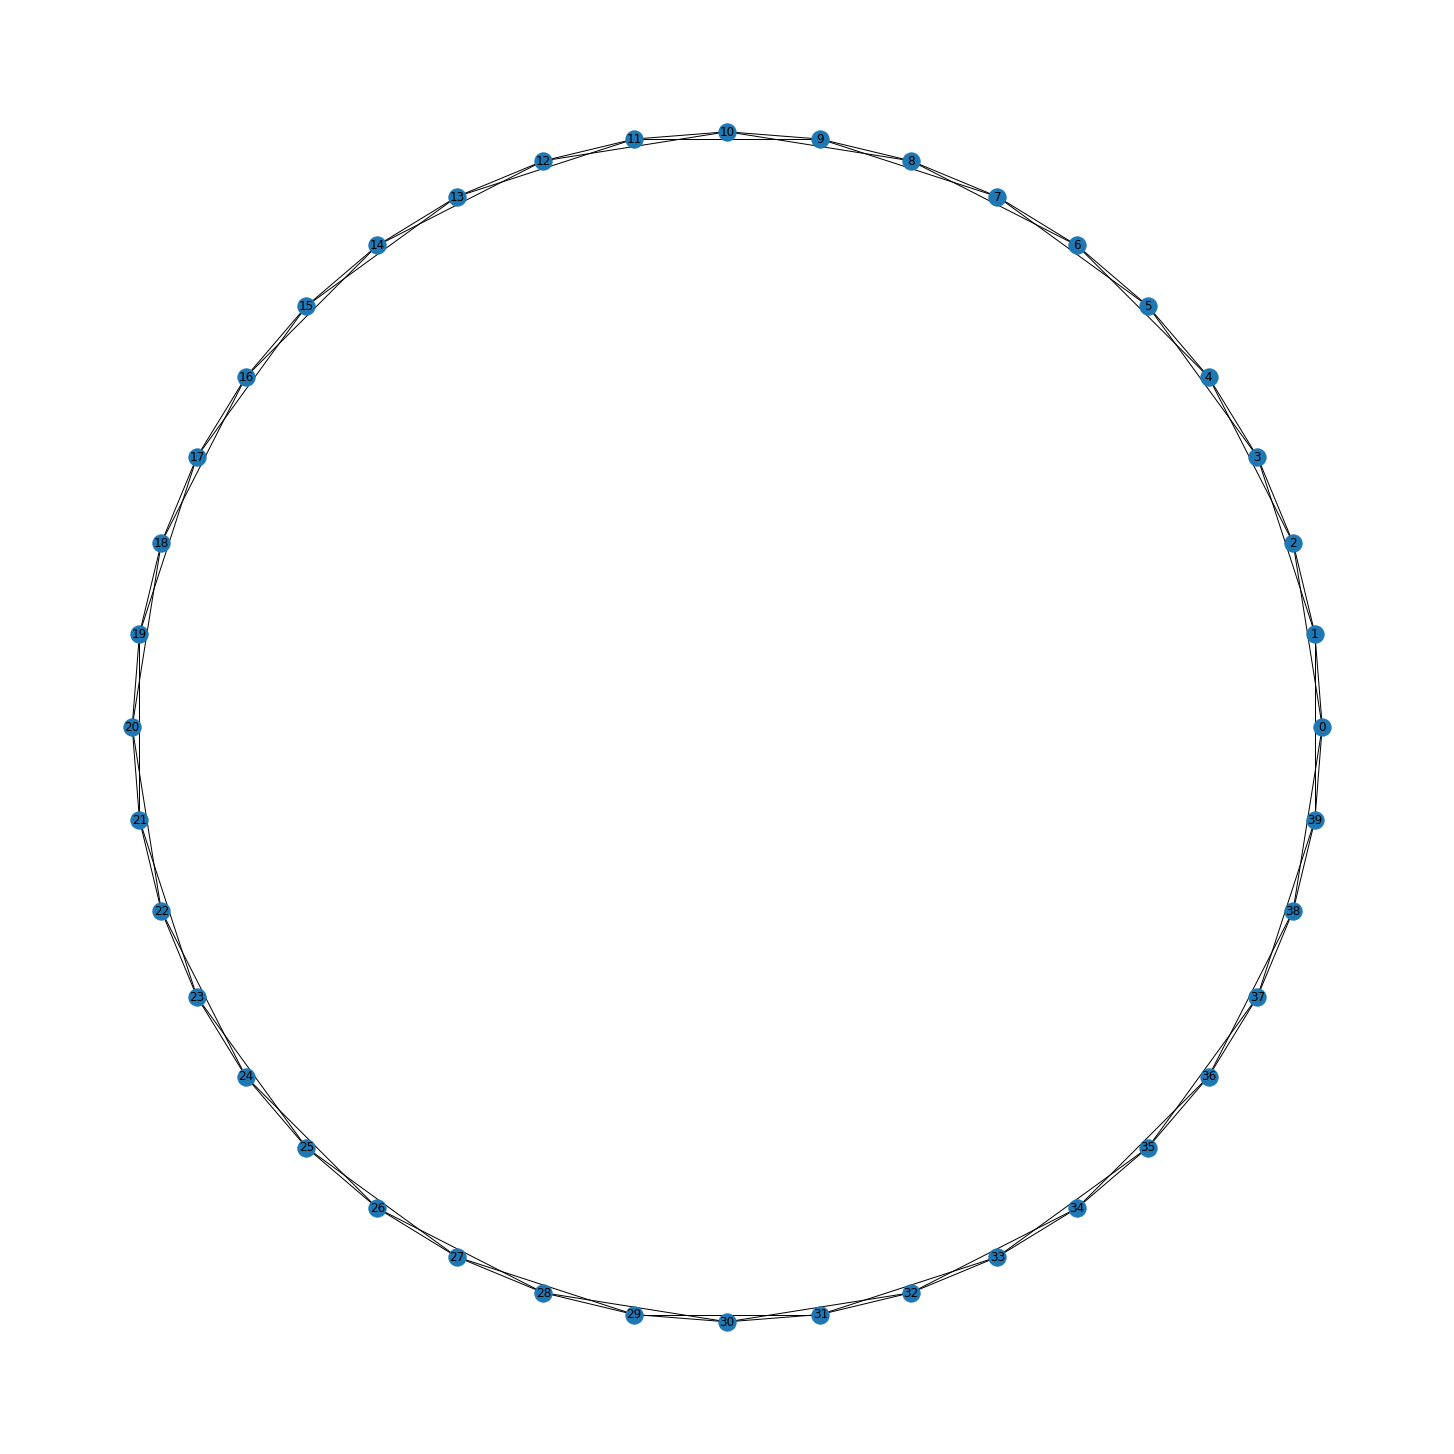

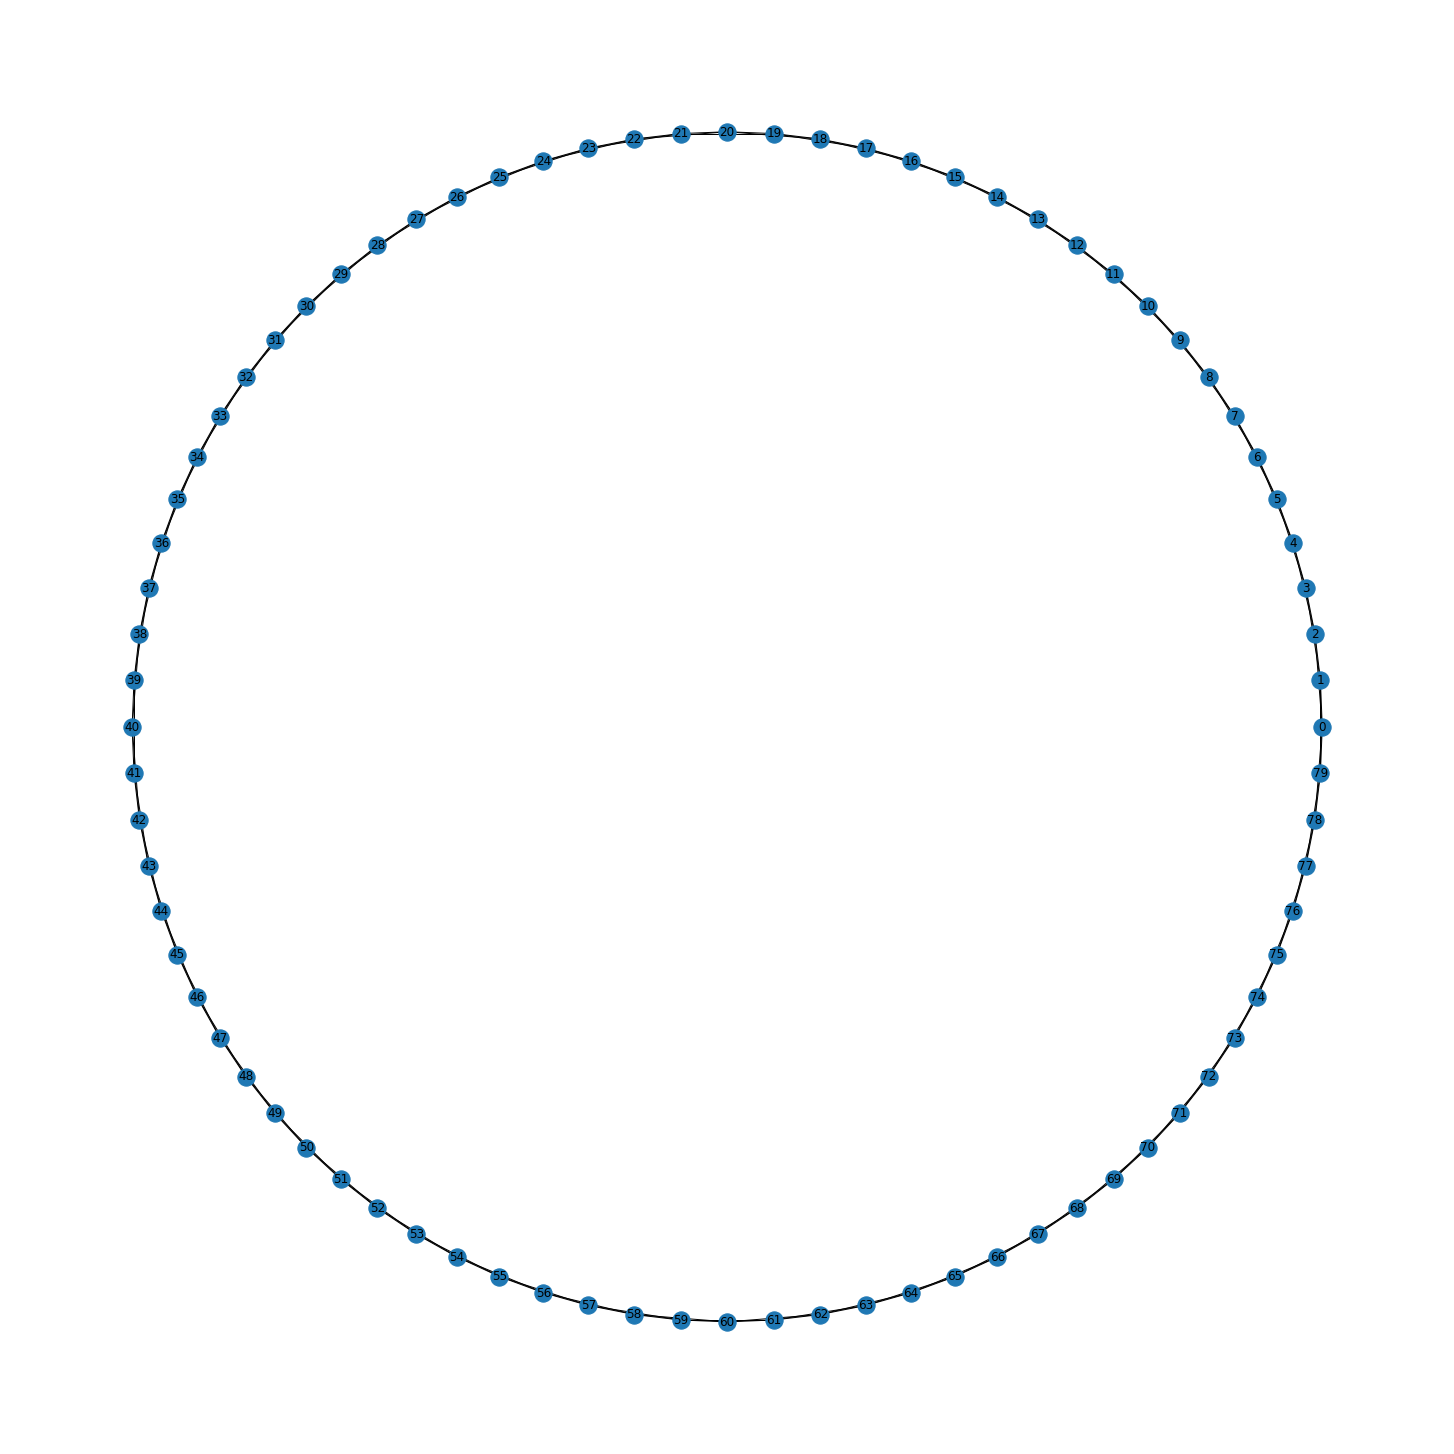

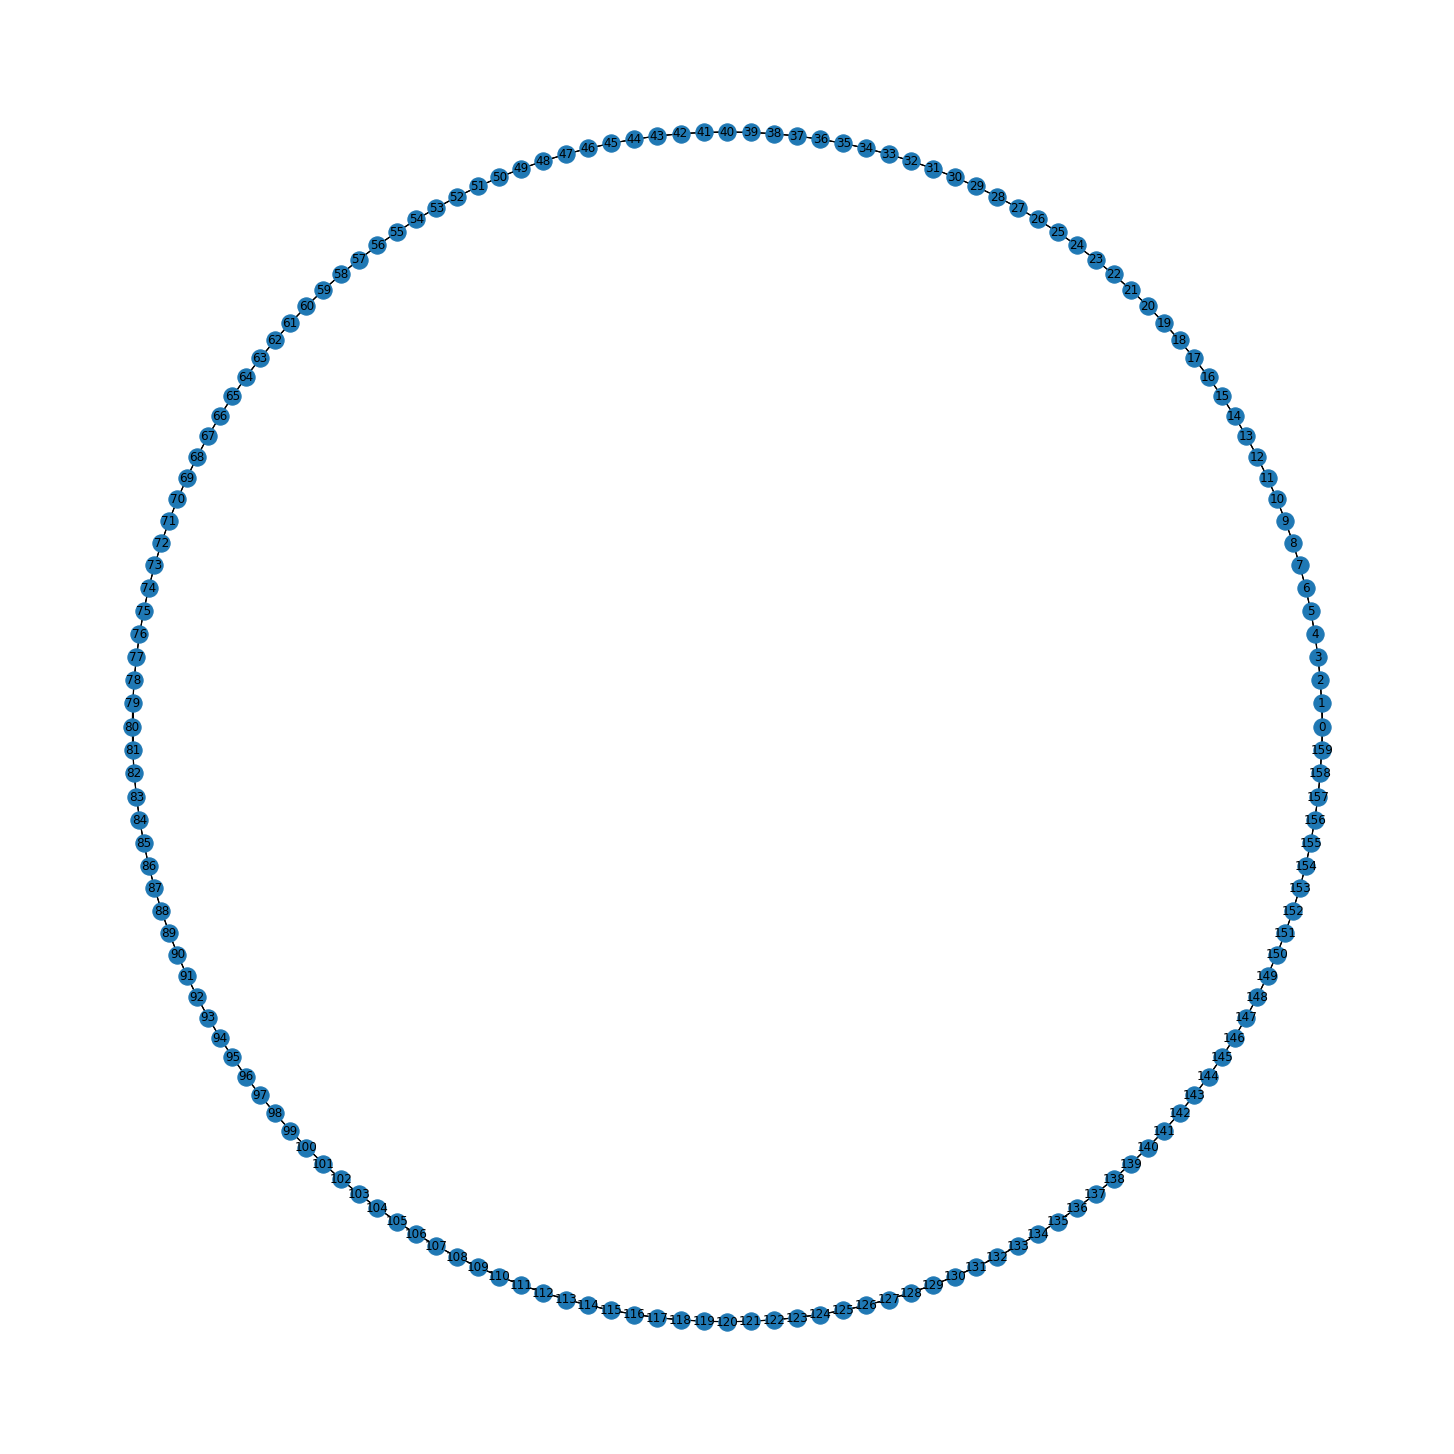

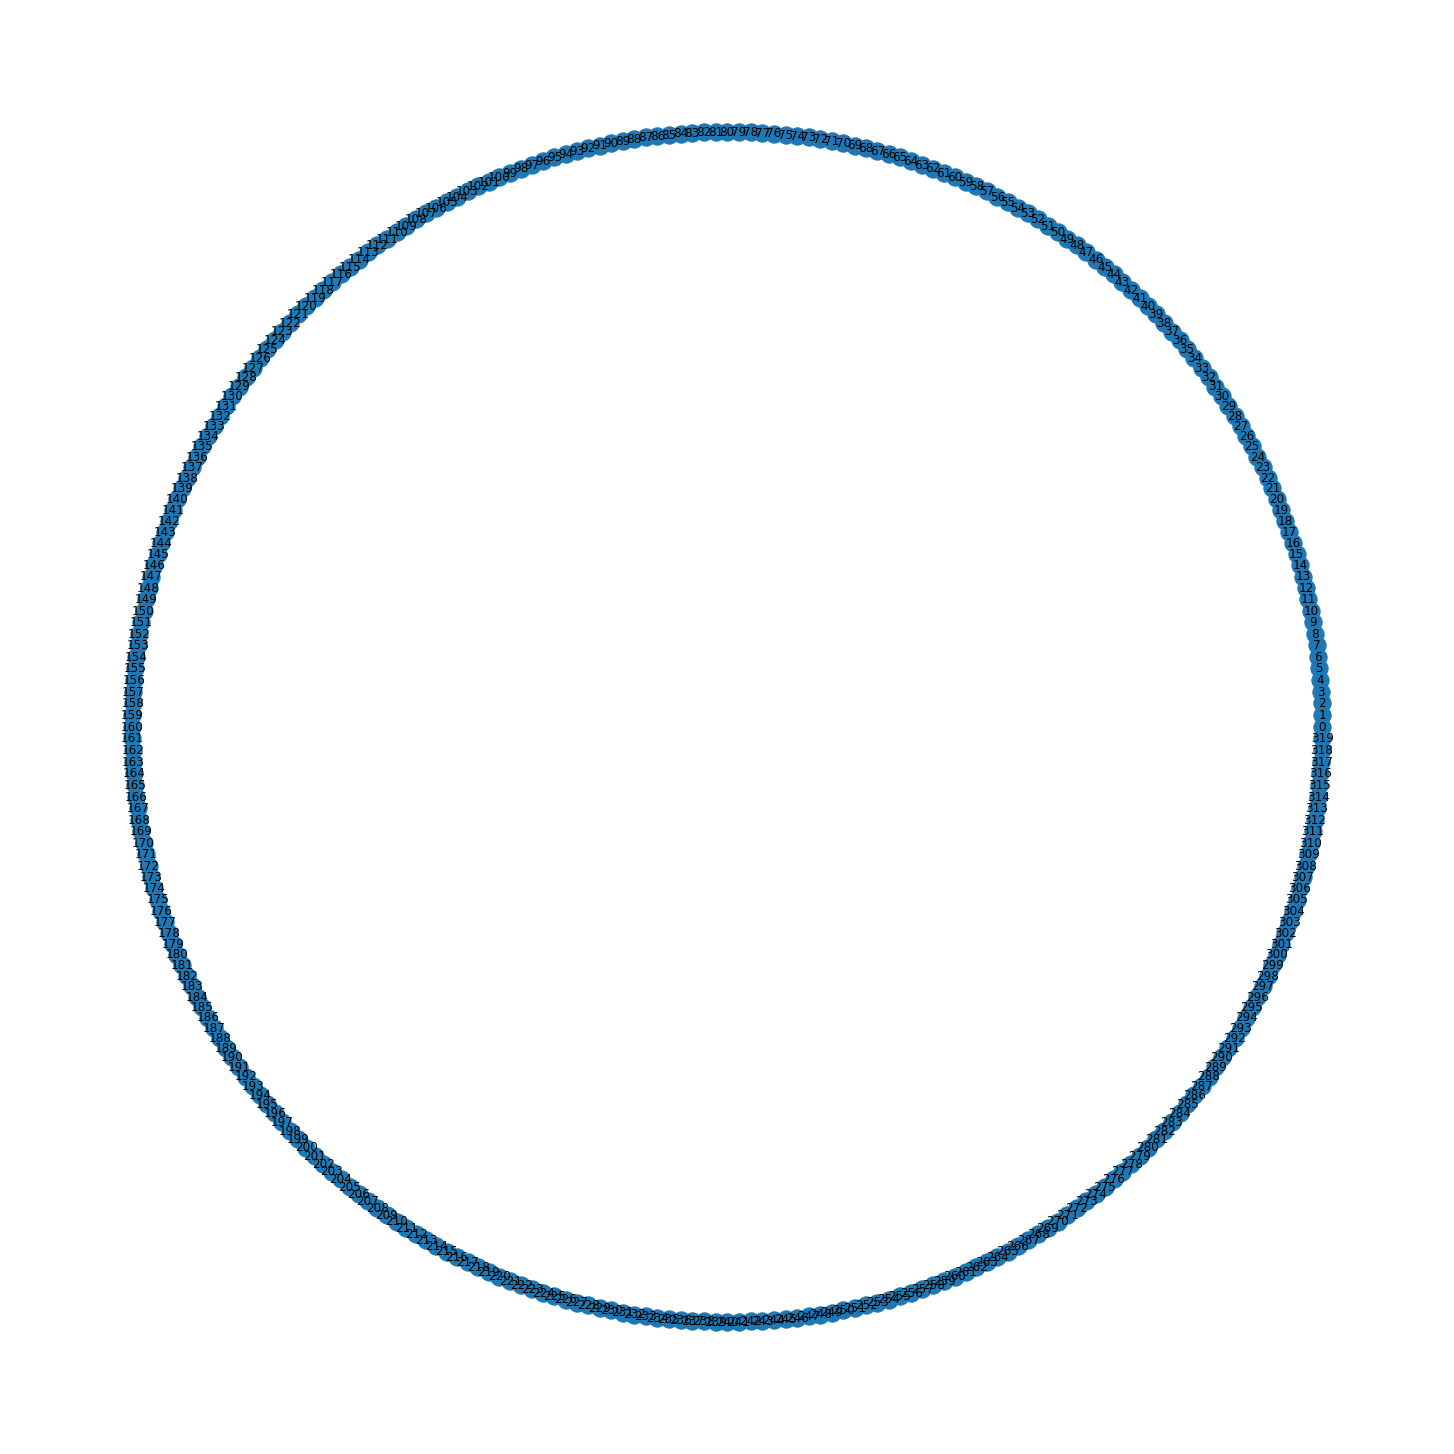

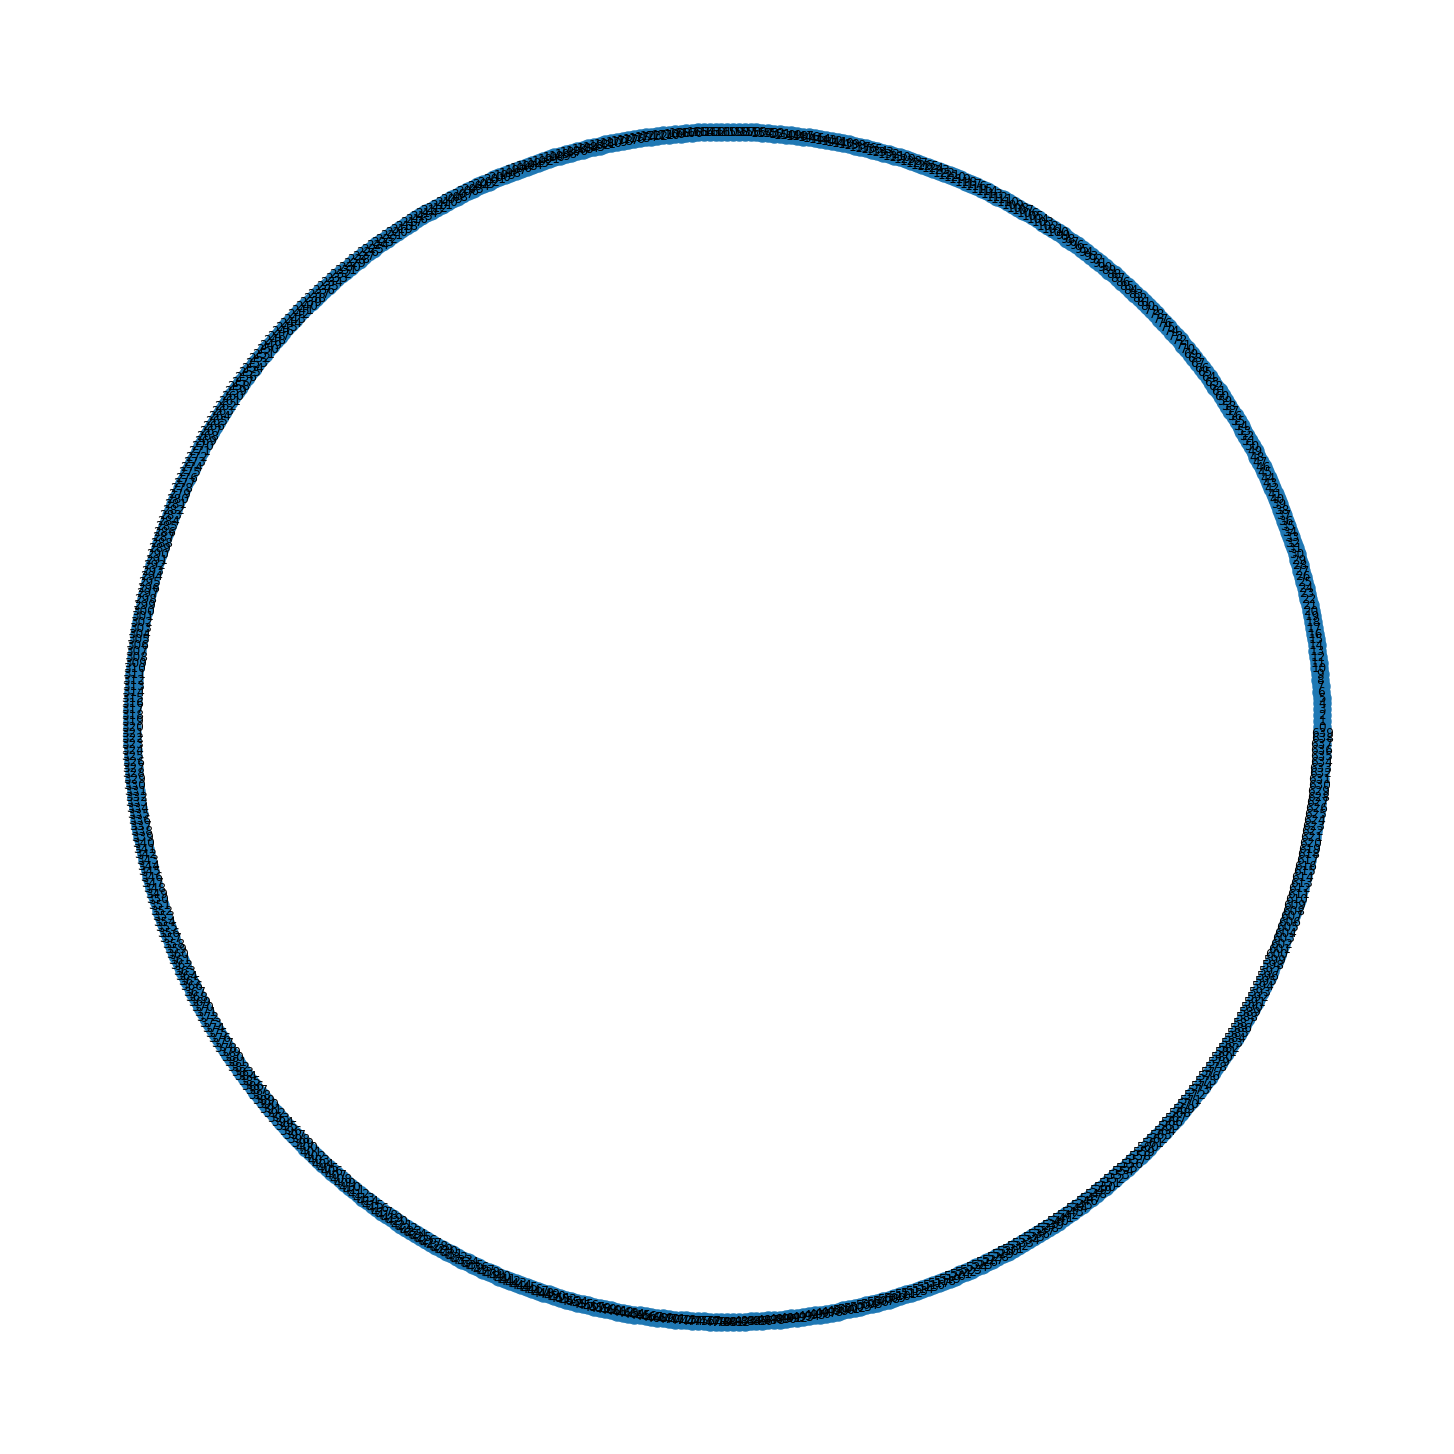

In [12]:
n_nodes_vec = [40,80,160,320,640]

for n_nodes in n_nodes_vec:
    G = nx.cycle_graph(n_nodes)

    for n in range(n_nodes):
        G.add_edge(n,((n+2) % n_nodes))
        G.add_edge(n,((n-2) % n_nodes))
    
    plt.figure(figsize=(20,20))
    pos = nx.circular_layout(G)
    nx.draw(G, pos, with_labels=True)
    print("n:", n_nodes)
    print("diameter", nx.diameter(G))
    print("clustering coefficient", nx.average_clustering(G), "\n")

Two observations:
- the clustering coefficient is large and does not scale with $n$;
- the diameter scales linearly with $n$.

To reduce the diameter and obtain a small world network, it is sufficient to add some random long-distance connections.

In [13]:
p = 0.002
n_nodes = 640

G = nx.cycle_graph(n_nodes)

for n in range(n_nodes):
    G.add_edge(n,((n+2) % n_nodes))
    G.add_edge(n,((n-2) % n_nodes))

for i in range(n_nodes):
    for j in range(n_nodes):
        if np.random.rand() < p:
            G.add_edge(i,j)
            
print("Diameter:", nx.diameter(G))
print("Clustering coefficient", nx.average_clustering(G), "\n")

Diameter: 7
Clustering coefficient 0.2064009774947273 



The new graph has a small diameter. The clustering coefficient is reduced, but still much larger than in Erdos-Renyi graph.

Still, the degree distribution is a shifted Poisson distribution, which differs from the most of the real networks.